<a href="https://colab.research.google.com/github/gg5d/DS-3005-GG/blob/main/FIRSTNAME_LASTNAME_pca_assignment_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load packages
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import eig
%matplotlib inline

Overview

> load dataset and split into `data` and `target` values

In [ ]:
X_hawk = pd.read_csv("hawks1.csv",  index_col=0)
names = list(X_hawk.columns)
X_hawk = X_hawk.to_numpy()


Y_hawk = pd.read_csv("hawks2.csv",  index_col=0)
Y_hawk = Y_hawk['Species'].to_numpy()

> look at dimension of X to see the number of samples/features

In [ ]:
hawks_df = pd.DataFrame(X_hawk, columns=(names))
samples, features = hawks_df.shape
hawks_df['Species'] = Y_hawk
print('Number of samples:', samples)
print('Number of features:', features)
# print number of samples and number of features

Number of samples: 892
Number of features: 4


> create a pairplot of `hawks` dataset

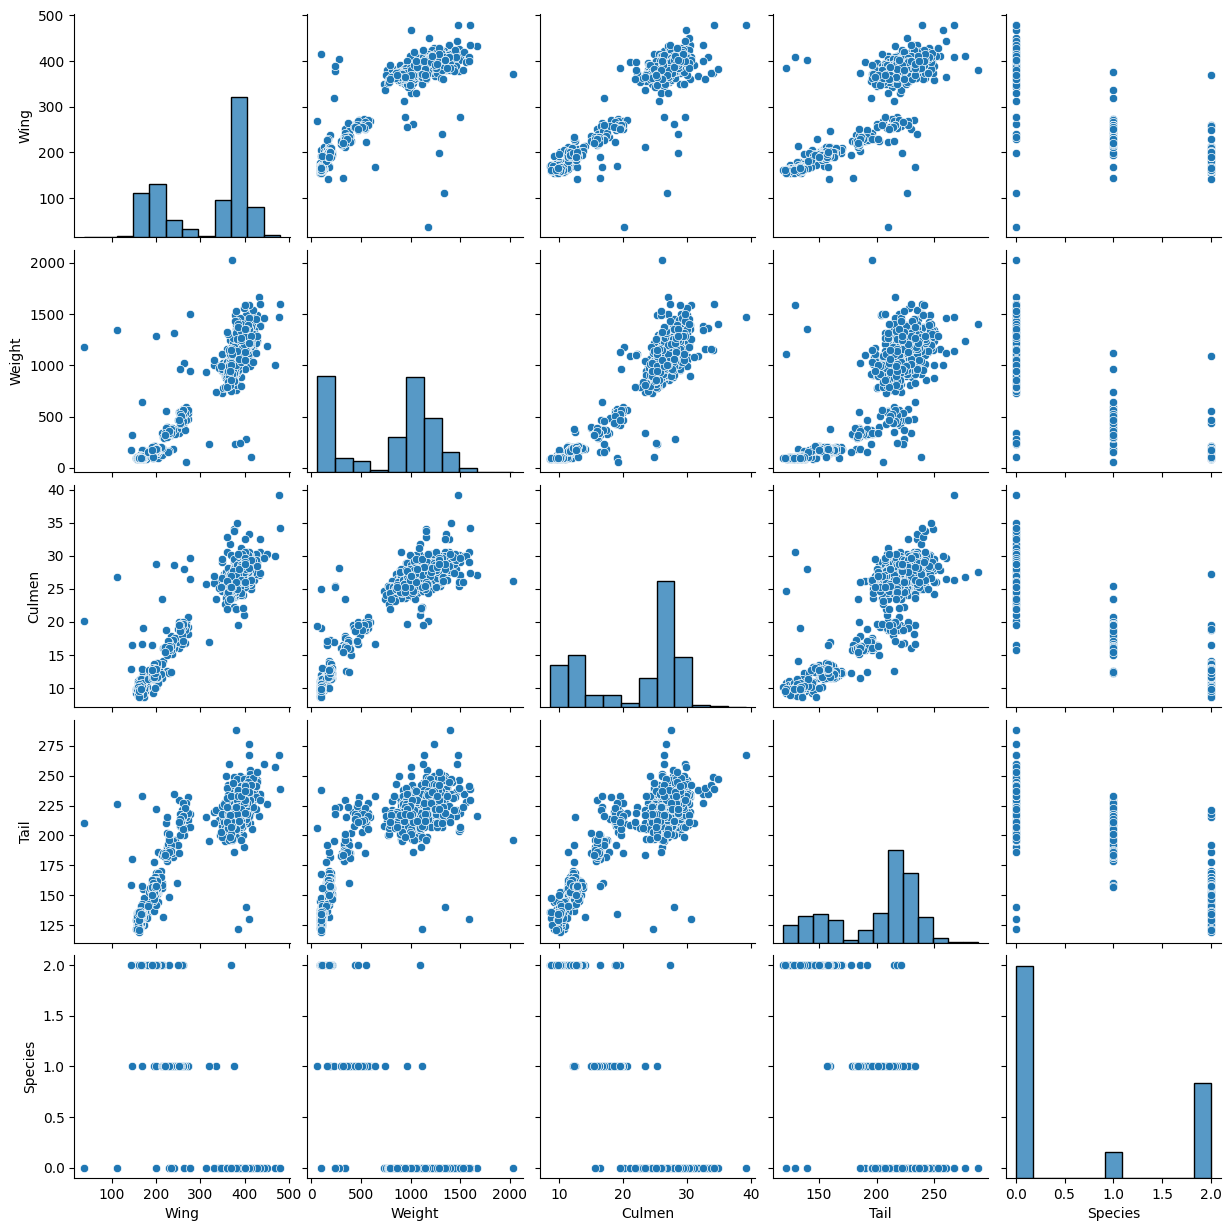

In [ ]:
sns.pairplot(hawks_df, diag_kind='hist')

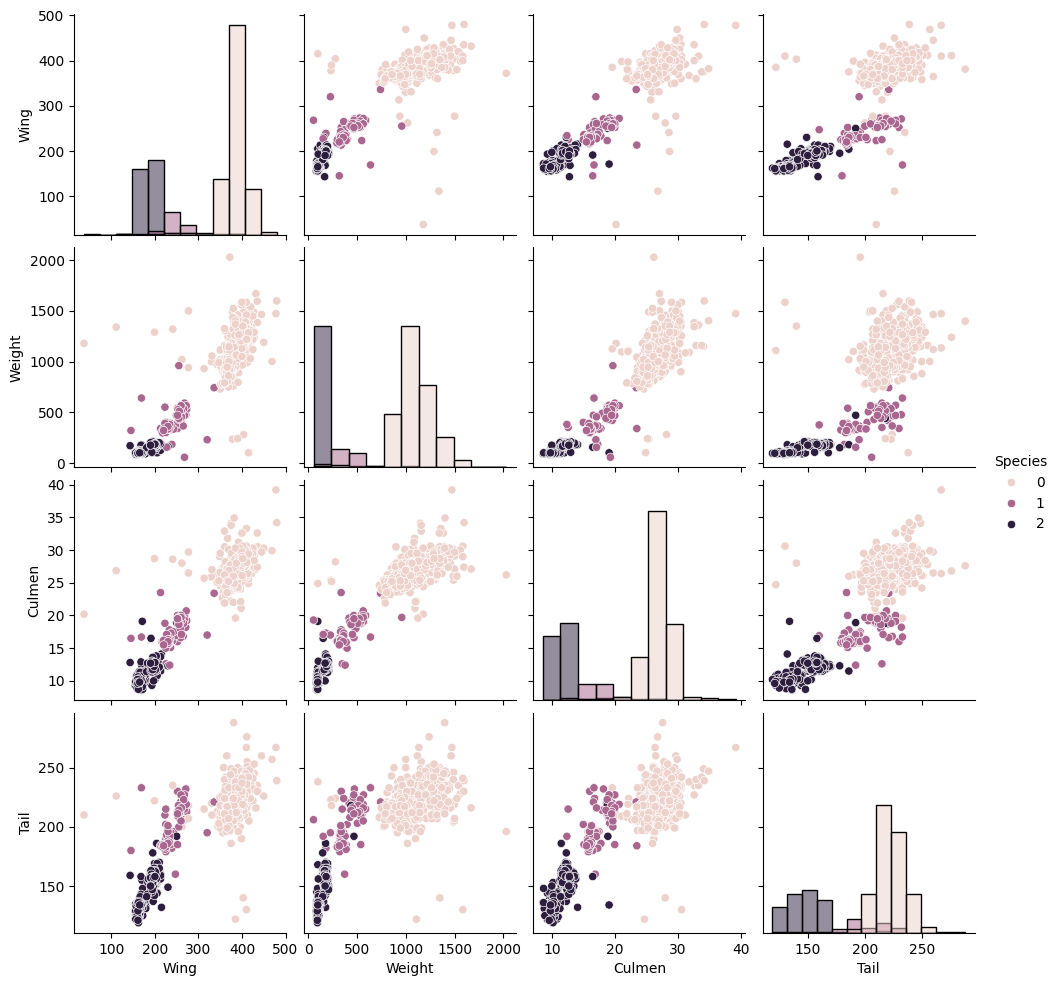

In [ ]:
sns.pairplot(hawks_df, hue='Species', diag_kind='hist')

 PCA


We need to standardize the data by taking the difference of the distance to the mean over the standard deviation to reduce variance and make the data easier to work with.

In [ ]:
def mean(x):
    return sum(x)/len(x)

def std(x):
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

hawks_std = Standardize_data(X_hawk)
hawks_std

array([[ 0.72461402,  0.32044393,  0.53366622,  0.5459288 ],
       [ 0.68260727,  0.47181033,  0.67092392,  0.98081916],
       [-0.53558837, -0.65262578, -0.42713763,  0.57310945],
       ...,
       [ 0.46207185,  0.0393349 ,  0.01208699,  0.32848361],
       [ 0.55658703,  0.1907013 ,  0.46503738,  0.21976102],
       [-1.22869968,  1.12052347,  0.9454393 ,  0.62747074]])

Calculate covariance matrix

We can calculate the covariance matrix by mapping the variance and covaraince of all elements of the standardized data. We then normalize this by dividing by the number of elements.

In [ ]:
hawks_std.T @ hawks_std  # Covariance matrix
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(hawks_std)
cov_mat

array([[1.00112233, 0.93584046, 0.95973131, 0.90079779],
       [0.93584046, 1.00112233, 0.95442777, 0.8755969 ],
       [0.95973131, 0.95442777, 1.00112233, 0.91522661],
       [0.90079779, 0.8755969 , 0.91522661, 1.00112233]])

Find Eigenvalues and Eigenvectors

From the covariance matrix, we can calculate the eigenvalues and eigenvectors of the matrix and pull them into variables, then reduce the matrix to remove the 3d to a 2d matrix to display the eigenvectors better.

In [ ]:
cov_mat = sym.Matrix(cov_mat)
cov_mat_eigs = cov_mat.eigenvects()
eig_vals = np.array([x[0] for x in cov_mat_eigs])
eig_vecs = np.array([x[2][0] for x in cov_mat_eigs])
eig_vecs = np.squeeze(np.asarray(eig_vecs))
eig_vecs.shape
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)
# print eigenvectors and eigenvalues

Eigenvalues 
 [3.77263916215347 0.0346705098863196 0.0621479224717583 0.135031743311124]
Eigenvectors 
 [[-0.503456703576381 -0.499405482510819 -0.507835902558267
  -0.489109607076952]
 [-0.385597091904293 -0.345182084642604 0.845897111149287
  -0.128927454430889]
 [-0.750086783308420 0.632870741350994 -0.0556708851322431
  0.183698652135676]
 [-0.187659393170135 -0.480539402361311 -0.153171557316345
  0.842854856403246]]


Sort Eigenvalues and Eigenvectors

 We simply combine the eigenvalue and corresponding eigenvector into a tuple, sort based on absolute value of the eigenvalue, then print them so the eigenvalue and eigenvector are shown together for easier readability.

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
for x in eig_pairs:
  for eig in x:
    print(eig)
  print()
# print eigenvalue/eigenvector pairs

3.77263916215347
[-0.503456703576381 -0.499405482510819 -0.507835902558267
 -0.489109607076952]

0.135031743311124
[-0.187659393170135 -0.480539402361311 -0.153171557316345
 0.842854856403246]

0.0621479224717583
[-0.750086783308420 0.632870741350994 -0.0556708851322431
 0.183698652135676]

0.0346705098863196
[-0.385597091904293 -0.345182084642604 0.845897111149287
 -0.128927454430889]




Select Principal Components

We are going to calculate explained variance to see how much each prinicpal component explains their respective variance within the data, and we should expect to see diminishing returns on the variance with the number of components, similar to the error of matrix-r approximations. We can calculate the explained variance by taking the % variance that can be explained by each principal component, and the cumulative explained variance is 1 to i principal components added together.  

Explained variance: [94.21, 3.37, 1.55, 0.87]
Cumulative explained variance: [94.21 97.58 99.13 100.0]


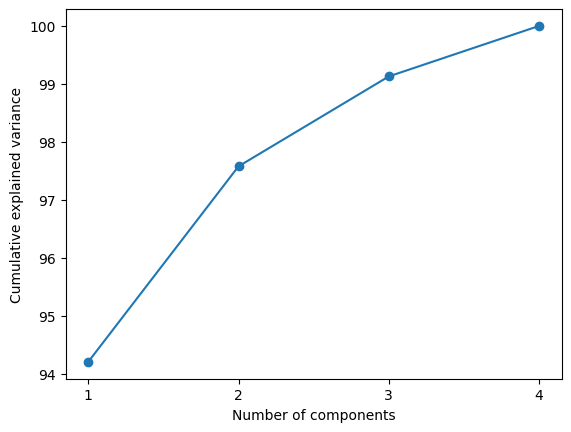

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = np.array([(i / eig_vals_total)*100 for i in eig_vals_sorted])
explained_variance = [round(x,2) for x in explained_variance]
print("Explained variance:", explained_variance)
c_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", c_explained_variance)
# print explained variance and cumulative explained variance
plt.plot(np.arange(1,features+1), c_explained_variance, '-o')
plt.xticks(np.arange(1,features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()
# plot cumulative explained variance for each component

Project the Data

We are now pulling two principal components out and comparing them, to see how each would split the data based on their respective explained variances, and displaying their total explained variance between the two principal components.

> PC1 vs PC2

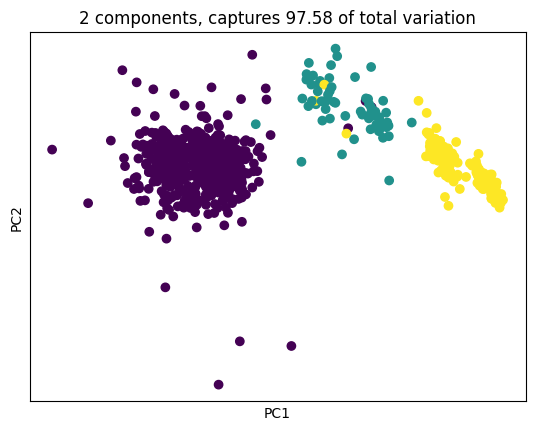

In [ ]:
W = eig_vecs_sorted[:2, :]
hawks_proj = hawks_std @ W.T
plt.scatter(hawks_proj[:, 0], hawks_proj[:, 1], c = Y_hawk)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(explained_variance[0] +explained_variance[1]))
plt.show()
# plot PC1 vs PC2

> PC1 vs PC3

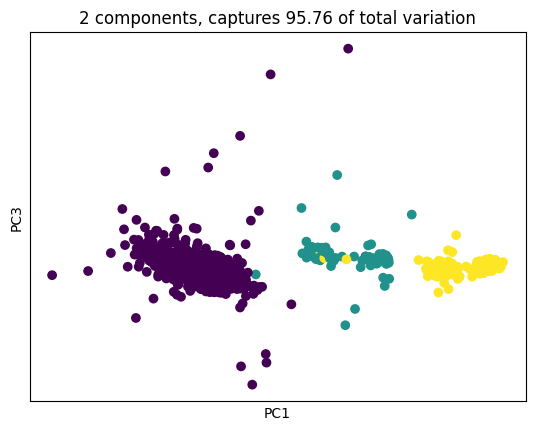

In [ ]:
# create new projection matrix
W = eig_vecs_sorted[[0,2], :]
hawks_proj = hawks_std @ W.T
plt.scatter(hawks_proj[:, 0], hawks_proj[:, 1], c = Y_hawk)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC3'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(explained_variance[0] +explained_variance[2]))
plt.show()
# plot PC1 vs PC3

> PC2 vs PC3

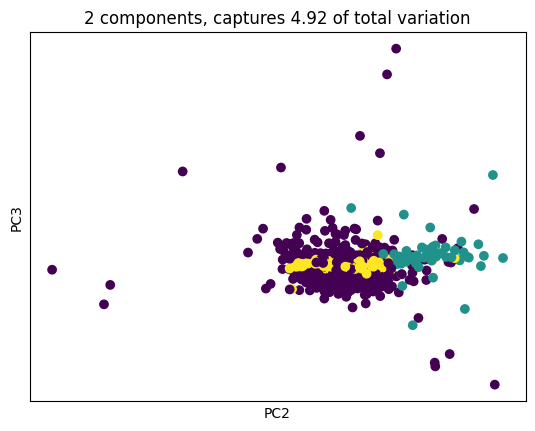

In [ ]:
# create new projection matrix
W = eig_vecs_sorted[1:3, :]
hawks_proj = hawks_std @ W.T
plt.scatter(hawks_proj[:, 0], hawks_proj[:, 1], c = Y_hawk)
plt.xlabel('PC2'); plt.xticks([])
plt.ylabel('PC3'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(explained_variance[1] +explained_variance[2]))
plt.show()
# plot PC2 vs PC3


 >> As we use the lower level principal components, the correctness of the clustering goes down respective to the total variation shown at the top of each graph. For example the 1v2 and 1v3 graphs show slight difference but are largely correct, whereas the 2v3 graph is completely mixed up, due to the first principal component cvarrying 94% of the data's explained variance, and the other principal components carrying increasingly smaller explained variance.